## **Question 1**

In [8]:
#importing the libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Loading the CIFAR10 Dataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 170498071/170498071 [08:12<00:00, 346506.59it/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [10]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 8, 3, stride=1, padding=0),
            nn.ReLU(),
            nn.Conv2d(8, 8, 3, stride=1, padding=0),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 8, 3, stride=1, padding=0),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 3, 3, stride=1, padding=0)
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(8, 3, kernel_size=(3, 3), stride=(1, 1))
  )
)

Epoch 1, Loss: 0.02445793657889947
Epoch 2, Loss: 0.003763758519943089
Epoch 3, Loss: 0.002778332629550696
Epoch 4, Loss: 0.0023443667107033053
Epoch 5, Loss: 0.0020664933273363906
Epoch 6, Loss: 0.001908187187857964
Epoch 7, Loss: 0.001794718435335466
Epoch 8, Loss: 0.0017262687991478046
Epoch 9, Loss: 0.0016631006958115551
Epoch 10, Loss: 0.0016171198754804804


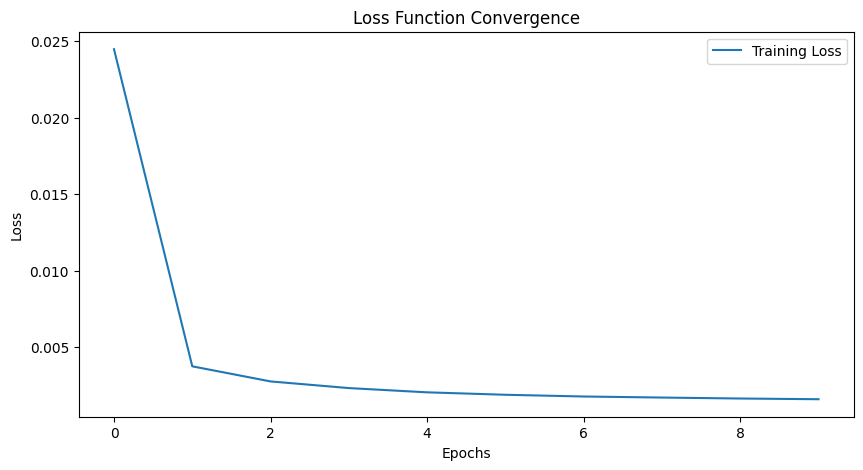

In [11]:
# Training Loop
epoch_losses = []
for epoch in range(10):
    running_loss = 0.0
    for data in trainloader:
        inputs, _ = data
        inputs = inputs.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(trainloader)
    epoch_losses.append(epoch_loss)
    print(f'Epoch {epoch + 1}, Loss: {epoch_loss}')

plt.figure(figsize=(10, 5))
plt.plot(epoch_losses, label='Training Loss')
plt.title('Loss Function Convergence')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


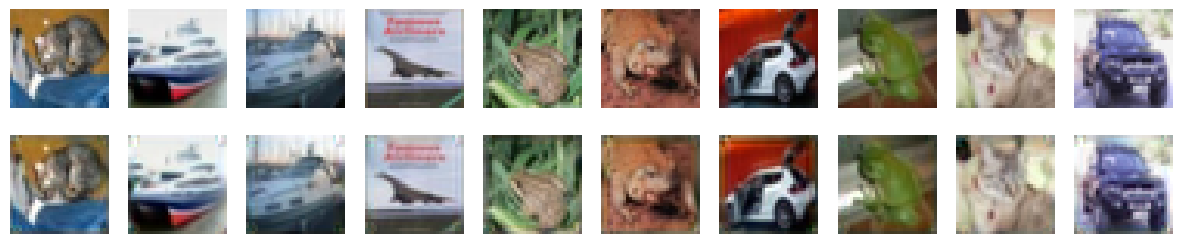

In [27]:
model.eval()
dataiter = iter(testloader)
images, _ = next(dataiter)
images = images.to(device)
outputs = model(images)
images = images.cpu().numpy()
outputs = outputs.cpu().detach().numpy()

fig, axes = plt.subplots(2, 10, figsize=(15, 3))
for i in range(10):
    ax = axes[0, i]
    ax.imshow(np.transpose(images[i], (1, 2, 0)))
    ax.axis('off')
    ax = axes[1, i]
    ax.imshow(np.transpose(outputs[i], (1, 2, 0)))
    ax.axis('off')
plt.show()